## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [8]:
# yfinance는 조금 불안정함
!pip install yfinance

In [12]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
# 구글 주식 데이터 로딩
goog = yf.download("GOOG", start="2004-01-01", end="2024-12-31")
goog.head()

Failed to get ticker 'GOOG' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOOG']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,


In [ ]:
# [+] 종가(Close) 데이터만 사용하기
goog = yf.download("GOOGL", start="2004-01-01", end="2024-12-31")["Close"]
goog

<Axes: xlabel='Date'>

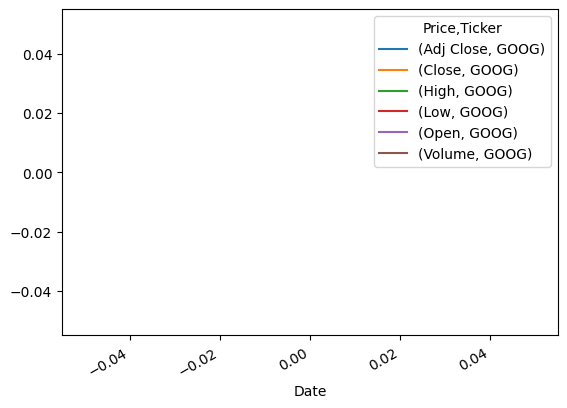

In [ ]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

In [ ]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('ME').mean()
goog_downsampled

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

In [ ]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('ME').plot()
print(goog_downsampled)

goog_downsampled.plot()

In [ ]:
# [+] 업샘플링: resample()
goog_upsampled = goog.resample('12h').mean()
print(goog_upsampled)

#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [ ]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [ ]:
# shifting 응용: 주가 변화율 계산
goog_shifted = goog.shift(periods=1) # [+] 시프팅
(goog - goog_shifted) / goog_shifted # [+] 주가 변화율 계산

In [ ]:
# shifting 응용: 차분 시계열 구하기
goog_diff = goog - goog_shifted  # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

In [ ]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

In [ ]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)